In [26]:
#import libraries

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
import textblob
import re
import itertools
import os
import nltk
import sys
import json
import requests
import shap
import random 
import wordcloud
import snscrape.modules.twitter as sntwitter
import googletrans
import scipy as sp
import gensim
import gensim.corpora as corpora
import umap
import umap.plot
import xgboost
import transformers
import torch
import tensorflow
from textblob import TextBlob, Word, Blobber
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob.classifiers import NaiveBayesClassifier
from wordcloud import WordCloud, STOPWORDS
from googletrans import Translator, LANGUAGES
from pylab import rcParams         
from matplotlib import cm
from datetime import date
from pprint import pprint
from nltk import clean_html, bigrams
from bs4 import BeautifulSoup as bs
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.collocations import *
from transformers import BertModel, BertConfig
from time import time
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD, PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from xgboost.sklearn import XGBRegressor, XGBClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn import tree
from scipy.stats import f_oneway, ttest_ind, pearsonr, linregress, normaltest
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider, LabelSet
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

#setting up plotting options

%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = 14,8
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)

#display options for Pandas

pd.set_option('max_columns', 30)
pd.set_option('max_rows', 60)

#Some useful functions


def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text) 
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
                
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def anova(a,b,c,d,e,f,g,h):
    stat, pvalue = f_oneway(a,b,c,d,e,f,g,h)
    print("ANOVA results: \n\nF-statistic = %g  P-Value = %g" % (stat, pvalue))
    if pvalue < 0.05:
        print("Decision: Reject null hypothesis")
    else:
        print("Decision: Not enough evidence to reject null hypothesis")

        #upper tailed hypothesis test function

def uppertailtest(a,b):
    stat, pvalue = ttest_ind(a,b, equal_var=False)
    print("Upper-tailed Hypothesis Test Results: \n\nStatistic = %g  P-Value = %g" % (stat, pvalue/2))
    if pvalue/2 < 0.05:
        print("Decision: Reject null hypothesis")
    else:
        print("Decision: Failed to reject null hypothesis")

Loading BokehJS ...

In [4]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'll',
           're',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves',
            'an',
            'into',
            'his',
            'my',
            'its',
            'up',
            'he',
            '11',
            '20',
            'kan',
            'tv',
            're',
            'S',
            's',
            '0',
            'o',
            '0',
            '_saigai',
            'pm',
            'she',
            'dos',
            'image',
            'no',
            'me',
            'very',
            'her',
            'because',
            'always',
            'only',
            'om',
            'pnrr',
            'http',
            '15',
            '_gov',
            'co',
            '21',
            'also',
            'II',
            'll',
            '%',
            'has',
            'had',
            '0',
            'such',
            'where',
            'again',
            'well',
            'were',
            'two',
            'euco',
            'us',
            'just',
            'but',
            'or',
            'than',
            'how',
            'what',
            'since',
            '',
            'was',
            'u',
            've',
            'do',
            'not',
            'most',
            'some',
            'under',
            'want',
            'your',
            'their',
            'get',
            're',
            'now',
            'they',
            'against',
            'about',
            'around',
            'another',
            'there',
            'been',
            'across',
            'those',
            '',
            'thing',
            'usually',
            'anything',
            'could',
            'came',
            'though',
            'makes',
            'nothing',
            'stay',
            'something',
            'lot',
            'one',
            'them',
            'those',
            'every',
            'these',
            'know',
            'E',
            'want',
            'let',
            'sure',
            'its',
            'm',
            'u',
            'other',
            'which',
            'should',
            'ever',
            'back',
            'still',
            'give',
            'said',
            'like',
            'gives',
            'little',
            'really',
            'bit',
            'cup',
            'much',
            'pretty',
            'use',
            'would',
            'way',
            'many',
            'say',
            'make',
            'made',
            'gave',
            'say',
            'seems',
            'instead',
            'dona',
            '_x000d_',
            '5',
            '3',
            '2',
            '1',
            '4',
            'the',
            'to',
            'and',
            'we',
            'for',
            'our',
            'is',
            'i',
            'thi',
            'with',
            'it',
            'will',
            'you',
            'that',
            'are',
            's',
            'have',
            'rt',
            'be',
            'today',
            'as',
            'â‚¬',
            'of',
            'in',
            'a',
            'this',
            'on',
            'all',
            'at',
            'more',
            'from',
            'by',
            'can',
            'if',
            'so',
            't',
            'ðŸ‡ª',
            'ï¸',
            'â¤µ',
            'too',
            'ðŸ‡¹',
            '@10downingstreet',
            'ðŸ‡¦',
            'â€‹',
            'ðŸ‡¸',
            'am',
            'here',
            'come',
            '_commission',
            'dos',
            'out',
            'nh',
            '1',
            '2',
            '3',
            '4',
            '5',
            '6',
            '7',
            '8',
            '9',
            '10',
            '19',
             'u',
            'll',
             'amp',
            'dos']
stop_words.extend(st1)

In [1]:
#Some useful functions


def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text) 
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    lemmatizer = nltk.WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    return text

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
                
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +0}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [40]:
#import Tweets dataset

g7tweetsallp = pd.read_csv('../datasets/g7tweetsdatawithsentiment2semibalanced.csv')
g7tweetsallp.tail(2)

g7tweetsall = pd.read_csv('../datasets/g7tweetsdatawithsentiment2.csv')
g7tweetsall.tail(2)

date  month  year  day month_year   weekday        username  \
9916  31/07/2021 14:14      7  2021   31     Jul-21  Saturday  @JustinTrudeau   
9917  31/07/2021 17:45      7  2021   31     Jul-21  Saturday       @JoeBiden   

              leader        country language  \
9916  Justin Trudeau         Canada       fr   
9917       Joe Biden  United States       en   

                                                  tweet  \
9916  Le droit des femmes de choisir appartient à el...   
9917  .@TheDemocrats are making historic, early stra...   

                                       translated_tweet  length  like_count  \
9916  Women's right to choose belongs to them alone....     223        1101   
9917  . are making historic, early strategic investm...     238        5546   

      retweet_count  ...  contains_delta  contains_future  contains_trump  \
9916            184  ...               0                0               0   
9917            890  ...               0                0               0   

      k_9_means_cluster    Topic1  Topic2    Topic3    Topic4    Topic5  \
9916          cluster 4  0.000000     0.0  0.169045  0.085529  0.000000   
9917          cluster 4  0.051577     0.0  0.179979  0.000000  0.050018   

        Topic6  Topic7    Topic8   Topic9  Dominant_Topic  \
9916  0.429679     0.0  0.105734  0.18779         Topic 6   
9917  0.467694     0.0  0.231408  0.00000         Topic 6   

                               Topic  
9916  Topic 6_Community Coordination  
9917  Topic 6_Community Coordination  

[2 rows x 77 columns]

In [65]:
#Keyword dummies
g7tweetsall['contains_mask'] = g7tweetsall['translated_tweet'].str.contains('mask', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_mask"] = g7tweetsall["contains_mask"].astype(int)

g7tweetsall['contains_vaccin'] = g7tweetsall['translated_tweet'].str.contains('vaccin', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_vaccin"] = g7tweetsall["contains_vaccin"].astype(int)

g7tweetsall['contains_travel'] = g7tweetsall['translated_tweet'].str.contains('travel', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_travel"] = g7tweetsall["contains_travel"].astype(int)

g7tweetsall['contains_quarantine'] = g7tweetsall['translated_tweet'].str.contains('quarantine', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_quarantine"] = g7tweetsall["contains_quarantine"].astype(int)

g7tweetsall['contains_reopen'] = g7tweetsall['translated_tweet'].str.contains('reopen', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_reopen"] = g7tweetsall["contains_reopen"].astype(int)

g7tweetsall['contains_econom'] = g7tweetsall['translated_tweet'].str.contains('econom', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_econom"] = g7tweetsall["contains_econom"].astype(int)

g7tweetsall['contains_delta'] = g7tweetsall['translated_tweet'].str.contains('delta', flags=re.IGNORECASE, regex=True)
g7tweetsall["contains_delta"] = g7tweetsall["contains_delta"].astype(int)

In [41]:
#Clean Tweets
g7tweetsall['translated_tweet'] = g7tweetsall['translated_tweet'].apply(str)
g7tweetsall['translated_tweet'] = g7tweetsall['translated_tweet'].apply(cleanTxt)

#Clean Tweets
g7tweetsallp['translated_tweet'] = g7tweetsallp['translated_tweet'].apply(str)
g7tweetsallp['translated_tweet'] = g7tweetsallp['translated_tweet'].apply(cleanTxt)

In [42]:
#Remove stopwords
g7tweetsall['translated_tweet'] = [word for word in g7tweetsall['translated_tweet'] if word.lower() not in stop_words]
g7tweetsallp['translated_tweet'] = [word for word in g7tweetsallp['translated_tweet'] if word.lower() not in stop_words]

In [ ]:
#Calculate polarity and subjectivity
g7tweetsall['subjectivity'] = g7tweetsall['translated_tweet'].apply(getSubjectivity)
g7tweetsall['polarity1'] = g7tweetsall['translated_tweet'].apply(getPolarity)
g7tweetsall['analysis'] = g7tweetsall['polarity'].apply(getAnalysis)

In [2]:
g7tweetsall['polarity1'] = g7tweetsall['translated_tweet'].apply(getPolarity)
g7tweetsall

NameError: name 'g7tweetsall' is not defined

In [ ]:
#Plot Polarity vs Subjectivity

plt.figure(figsize=(8,6))
for i in range(0, g7tweetsall.shape[0]):
    plt.scatter(g7tweetsall['polarity'][i], g7tweetsall['subjectivity'][i], color='Grey' )
    
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

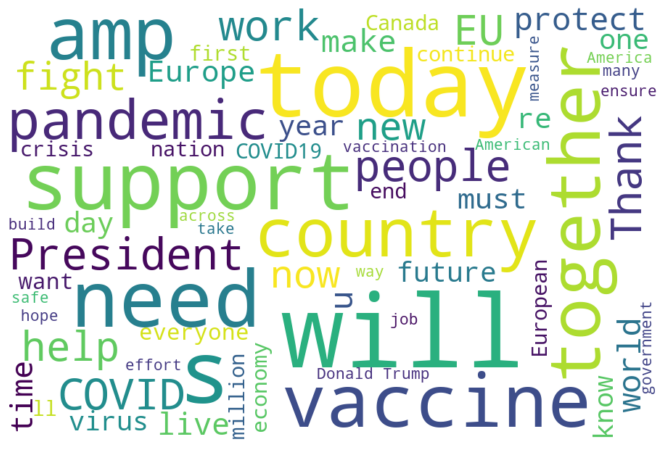

In [7]:
allWords = ' '.join( [twts for twts in g7tweetsall['translated_tweet']])
wordCloud = WordCloud( background_color='white', width = 900, height = 600, random_state = 21, min_font_size = 20, max_font_size=140).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(g7tweetsall['translated_tweet'])

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


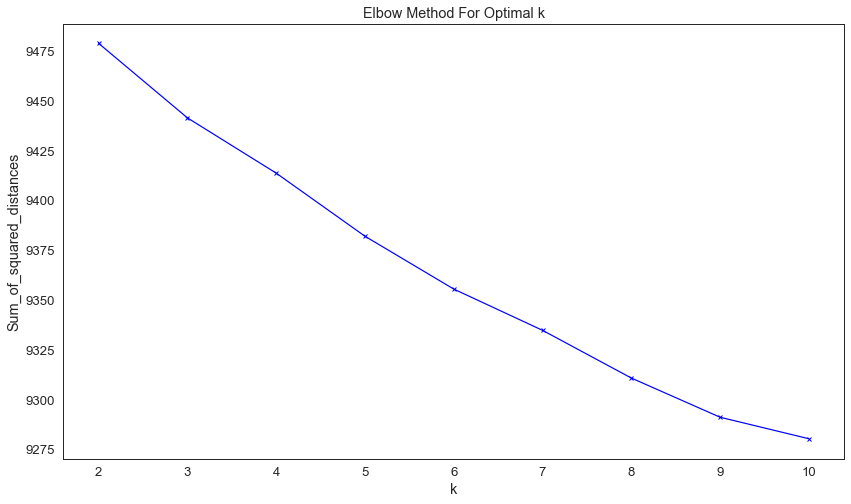

In [208]:
Sum_of_squared_distances = []
K = range(2,11)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [211]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweet_cl=pd.DataFrame(list(zip(g7tweetsall['translated_tweet'],labels)),columns=['translated_tweet','cluster'])
print(tweet_cl.sort_values(by=['cluster']))

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                       translated_tweet  cluster
9165  Yesterday, a village in BC beat the heat recor...        0
5669  This morning, Minister _Guilbeault announced h...        0
914   If you have symptoms of coronavirus, you are e...        0
5670  Artists and cultural workers keep us entertain...        0
7252  If you are a student or young, here's what you...        0
...                                                 ...      ...
3395  Statement of the President on  Cabinet Decree ...        8
876   : Kan Chief Cabinet Secretary-press conference...        8
4340  Tomorrow, Wednesday, December 30, at 11 am, wi...        8
5460  WATCH LIVE: An update on coronavirus (22 Febru...        8
3121  Statement to the press by the President  ahead...        8

[9918 rows x 2 columns]


C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster: 0


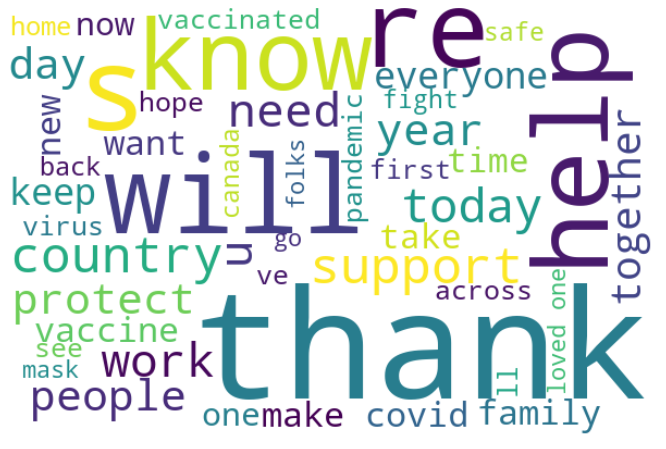

Cluster: 1


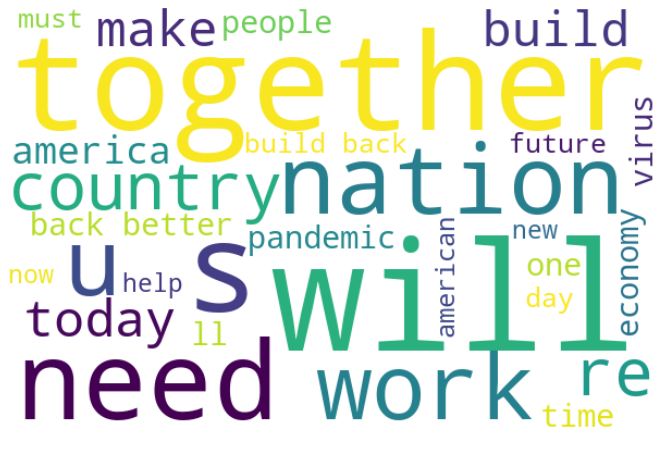

Cluster: 2


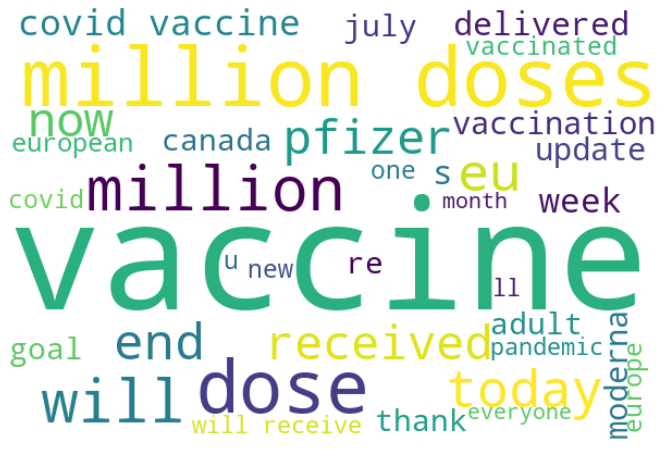

Cluster: 3


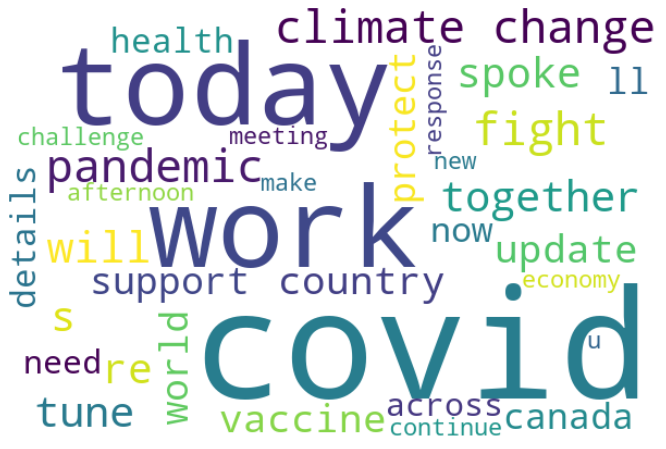

Cluster: 4


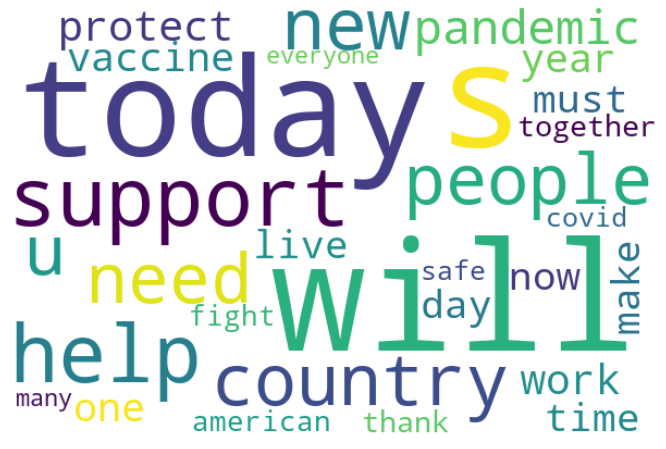

Cluster: 5


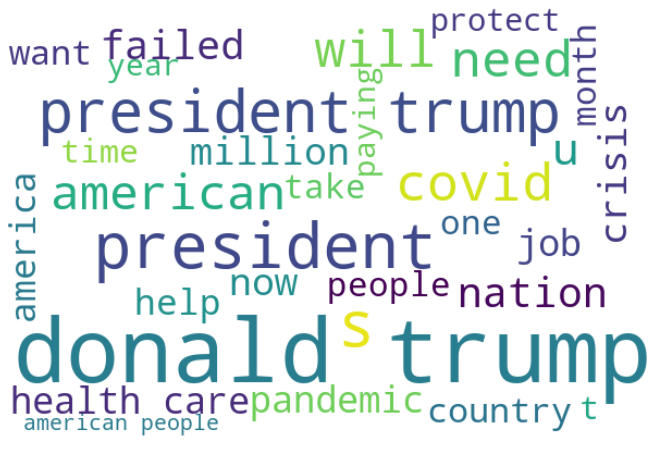

Cluster: 6


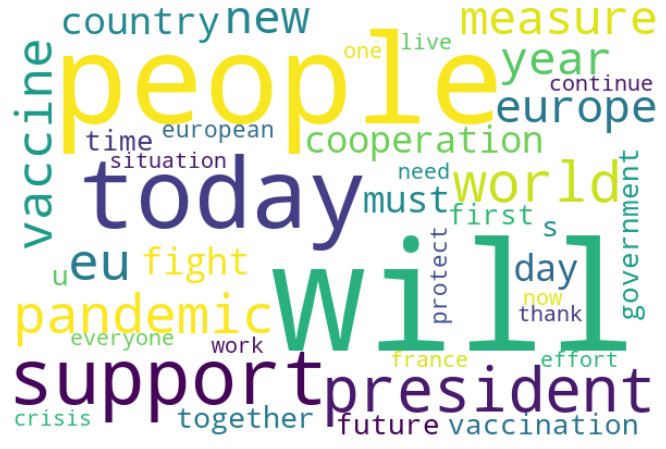

Cluster: 7


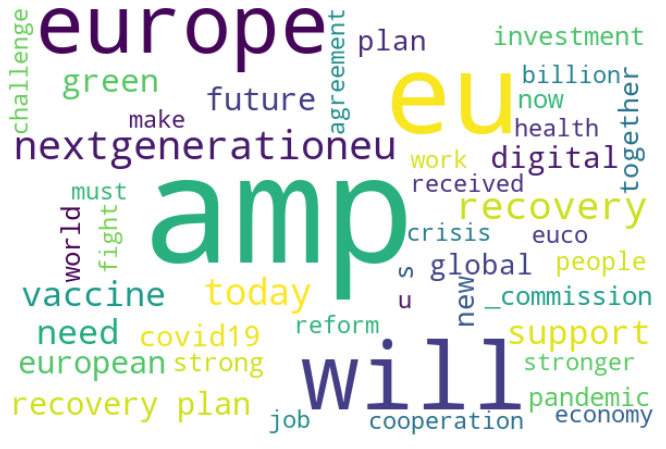

Cluster: 8


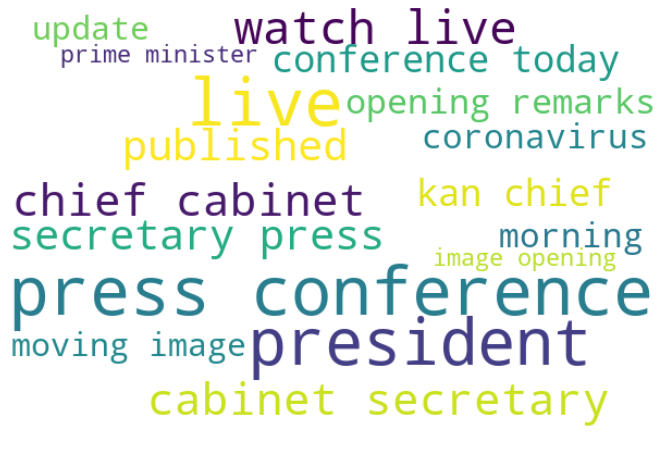

In [214]:
result=pd.DataFrame(tweet_cl)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['translated_tweet'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(width = 600, height = 400, random_state = 21, min_font_size = 20, max_font_size=140, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=tweet_cl[tweet_cl.cluster==k]['translated_tweet']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [52]:
tweet_cl.info

<bound method DataFrame.info of                                        translated_tweet  cluster
0     At a time when Americans might need health car...        1
1     It's now April, and:\n\n- States still don't h...        1
2     To all of you who are living with autism, I th...        3
3     _Commission: We are working to bring Europeans...        0
4     _GOV  COVID19 Freely available series European...        0
...                                                 ...      ...
9913  We’re in for a long fight against wildfires th...        1
9914  This week, we reached a historic Bipartisan In...        1
9915  The right to choose is a woman’s right and a w...        1
9916  Women's right to choose belongs to them alone....        1
9917  . are making historic, early strategic investm...        1

[9918 rows x 2 columns]>

In [215]:
tweet_cl.to_csv('../datasets/g7tweets9clusters.csv')

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
#Convert to list
df = g7tweetsall['translated_tweet'].values.tolist()

df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-179-2c8b8563baa2>:4: DeprecationWarning: invalid escape sequence \S
  df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]
<ipython-input-179-2c8b8563baa2>:7: DeprecationWarning: invalid escape sequence \s
  df = [re.sub('\s+', ' ', sent) for sent in df]


In [180]:
df = [re.sub("-", " ", sent) for sent in df]
df = [re.sub(":", "", sent) for sent in df]

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
df_words = list(sent_to_words(df))

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load("en_core_web_sm")

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
#Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:12]]

[[('beat', 1),
  ('call', 1),
  ('commit', 1),
  ('cooperation', 1),
  ('focus', 1),
  ('international', 1),
  ('pandemic', 1),
  ('phone', 1),
  ('president', 1)]]

In [185]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.041*"announce" + 0.027*"provide" + 0.026*"measure" + 0.026*"canadian" + '
  '0.023*"pay" + 0.020*"government" + 0.018*"ensure" + 0.018*"progress" + '
  '0.016*"meeting" + 0.015*"american"'),
 (1,
  '0.053*"job" + 0.036*"right" + 0.034*"month" + 0.022*"tune" + '
  '0.021*"important" + 0.019*"ready" + 0.019*"infrastructure" + 0.019*"fund" + '
  '0.018*"food" + 0.017*"opportunity"'),
 (2,
  '0.046*"safe" + 0.034*"week" + 0.028*"crisis" + 0.028*"end" + 0.026*"leader" '
  '+ 0.023*"speak" + 0.023*"deliver" + 0.021*"climate_change" + 0.019*"act" + '
  '0.019*"action"'),
 (3,
  '0.045*"protect" + 0.043*"day" + 0.042*"world" + 0.041*"fight" + '
  '0.026*"strengthen" + 0.021*"cost" + 0.020*"nation" + 0.018*"place" + '
  '0.017*"cooperation" + 0.016*"face"'),
 (4,
  '0.088*"thank" + 0.061*"woman" + 0.036*"agenda" + 0.030*"stand" + '
  '0.029*"man" + 0.026*"soon" + 0.021*"partnership" + 0.021*"tell" + '
  '0.020*"heart" + 0.020*"activity"'),
 (5,
  '0.051*"time" + 0.040*"family" + 0.038

In [195]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.25588432064599

Coherence Score:  0.3233450126670523


In [197]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=21, step=1)

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


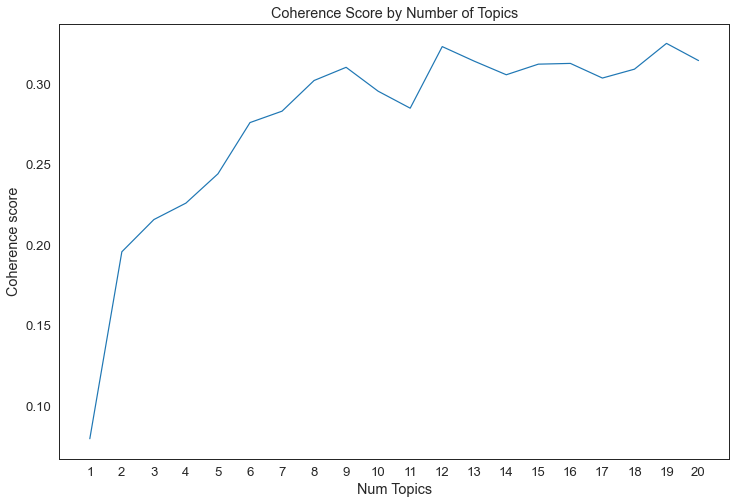

In [216]:
limit=21; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,8))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score by Number of Topics")
labels=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
plt.xticks(labels)
plt.show()

In [199]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Num Topics = 1  has Coherence Value of 0.0794
Num Topics = 2  has Coherence Value of 0.1955
Num Topics = 3  has Coherence Value of 0.2155
Num Topics = 4  has Coherence Value of 0.2257
Num Topics = 5  has Coherence Value of 0.2439
Num Topics = 6  has Coherence Value of 0.2757
Num Topics = 7  has Coherence Value of 0.2828
Num Topics = 8  has Coherence Value of 0.3019
Num Topics = 9  has Coherence Value of 0.31
Num Topics = 10  has Coherence Value of 0.2952
Num Topics = 11  has Coherence Value of 0.2847
Num Topics = 12  has Coherence Value of 0.3229
Num Topics = 13  has Coherence Value of 0.3139
Num Topics = 14  has Coherence Value of 0.3054
Num Topics = 15  has Coherence Value of 0.312
Num Topics = 16  has Coherence Value of 0.3125
Num Topics = 17  has Coherence Value of 0.3034
Num Topics = 18  has Coherence Value of 0.3089
Num Topics = 19  has Coherence Value of 0.3249
Num Topics = 20  has Coherence Value of 0.3142


In [204]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"vaccine" + 0.012*"help" + 0.010*"country" + 0.010*"protect" + '
  '0.010*"health" + 0.009*"work" + 0.008*"people" + 0.008*"need" + '
  '0.008*"crisis" + 0.007*"covid"'),
 (1,
  '0.016*"work" + 0.011*"support" + 0.011*"plan" + 0.011*"people" + '
  '0.010*"help" + 0.010*"vaccination" + 0.010*"recovery" + 0.008*"country" + '
  '0.008*"pandemic" + 0.008*"build"'),
 (2,
  '0.013*"work" + 0.012*"family" + 0.012*"people" + 0.010*"year" + '
  '0.010*"thank" + 0.010*"country" + 0.009*"community" + 0.009*"day" + '
  '0.008*"woman" + 0.007*"time"'),
 (3,
  '0.027*"dose" + 0.015*"support" + 0.013*"year" + 0.009*"thank" + '
  '0.008*"help" + 0.007*"adult" + 0.007*"receive" + 0.006*"day" + '
  '0.006*"continue" + 0.006*"country"')]


In [206]:

import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\user\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [10]:
n_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(g7tweetsall['translated_tweet'])

tf_feature_names = tf_vectorizer.get_feature_names()

NameError: name 'g7tweetsall' is not defined

In [65]:
n_components = 10
n_top_words = 10

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()

IndexError: list index out of range

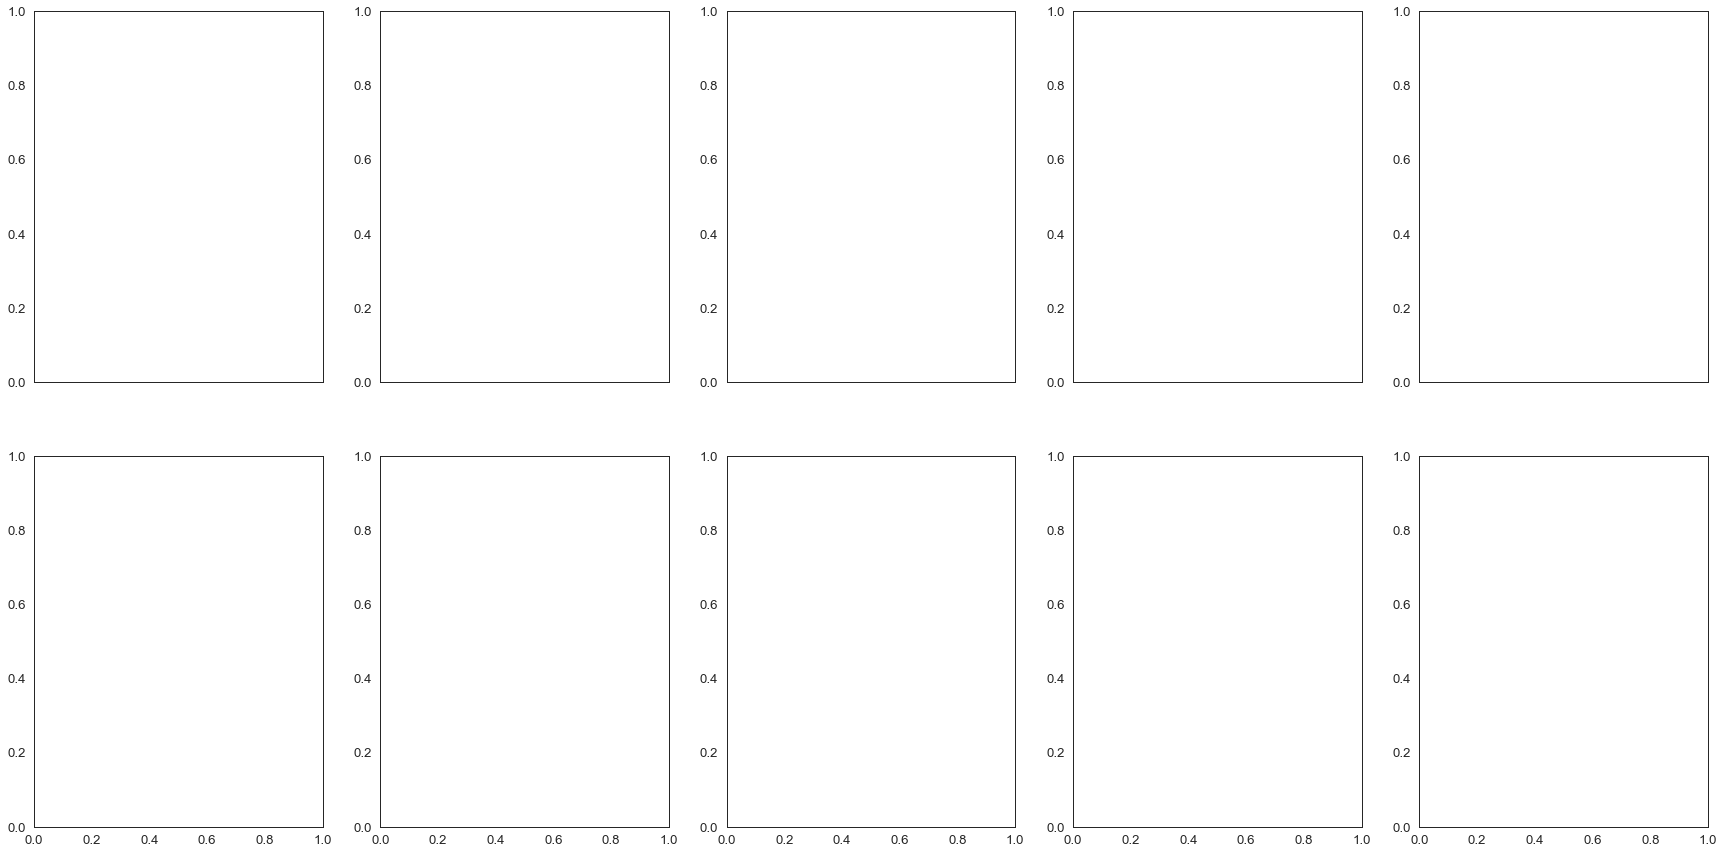

In [64]:
# Compute Perplexity

print('\nPerplexity: ', lda.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [7]:
g7tweetsall2 = pd.read_csv('../datasets/g7tweetsdatawithsentiment2.csv')

In [8]:
g7tweetsall2.dtypes

date               object
month               int64
year                int64
day                 int64
month_year         object
                   ...   
Topic6            float64
Topic7            float64
Topic8            float64
Topic9            float64
Dominant_Topic     object
Length: 73, dtype: object

In [22]:
g7tweetsall2['date'] = pd.to_datetime(g7tweetsall2['date'])

In [15]:
n_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(g7tweetsall2['translated_tweet'])

tf_feature_names = tf_vectorizer.get_feature_names()

In [17]:
n_components = 9
n_top_words = 10

lda = LatentDirichletAllocation(n_components=n_components, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()

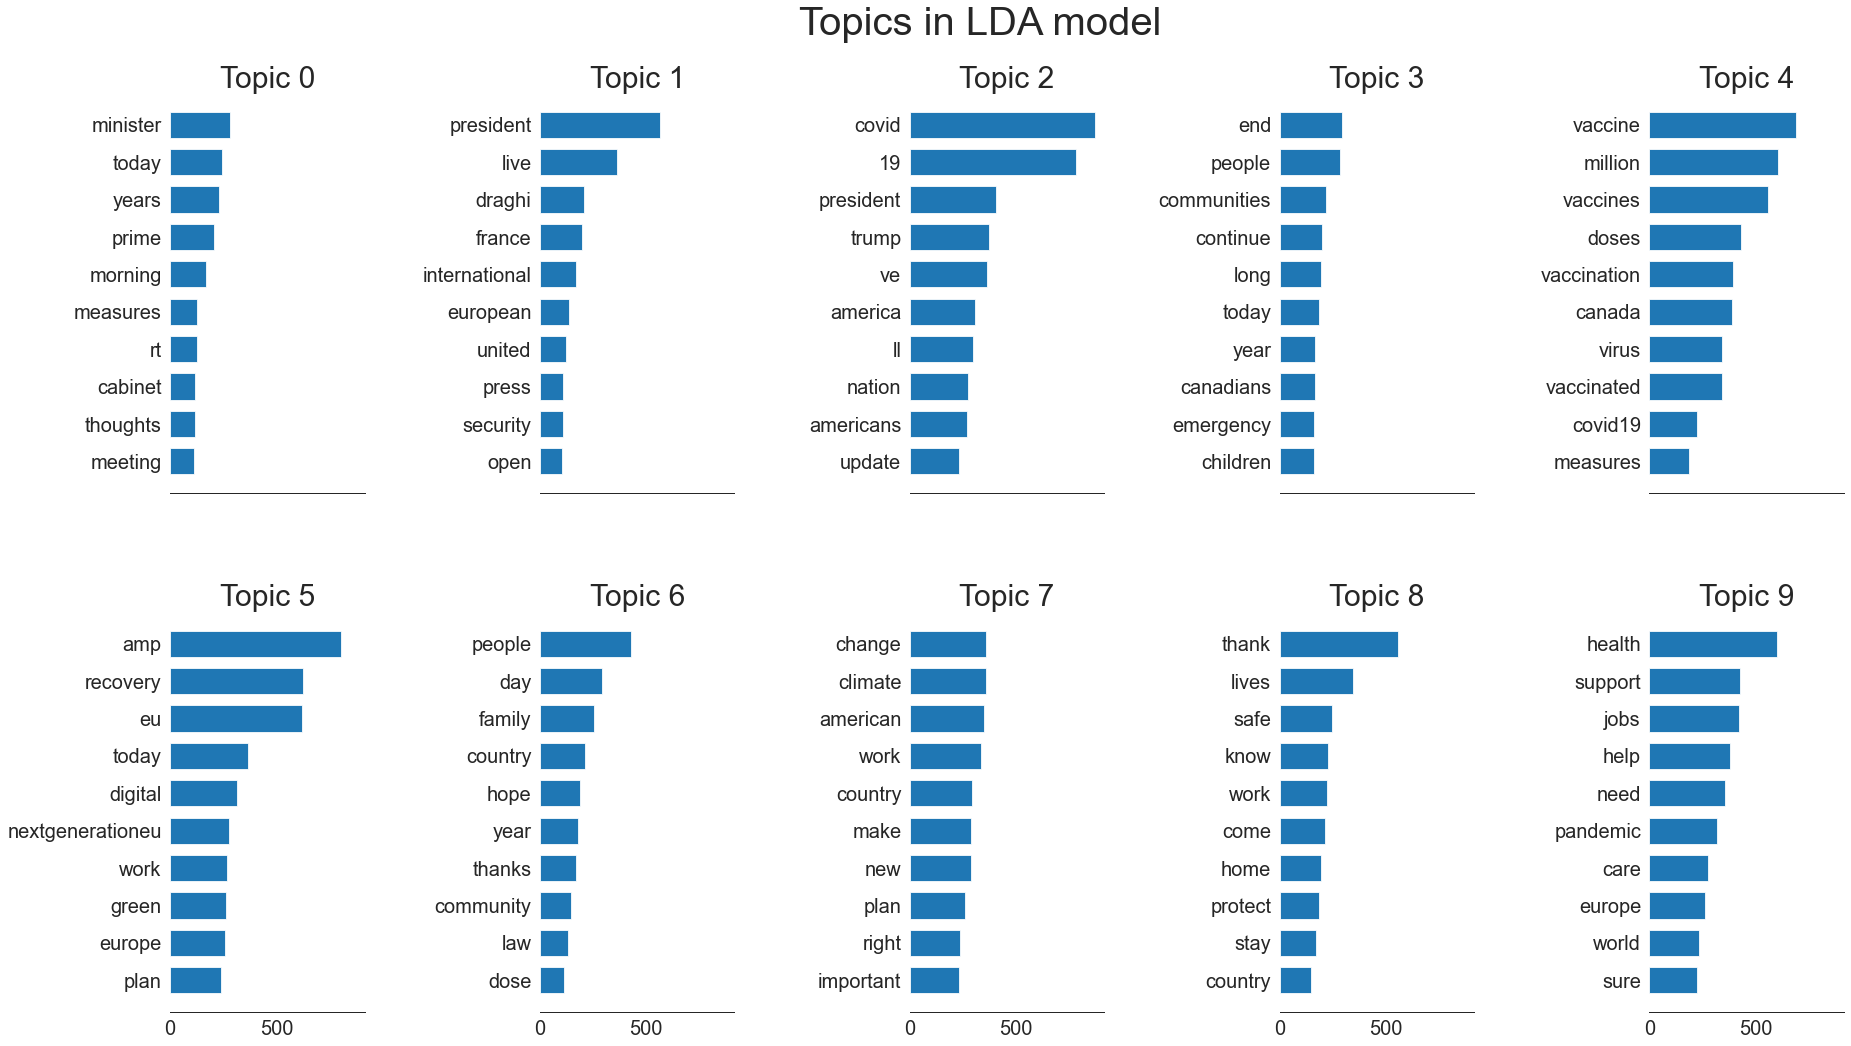

In [21]:
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [24]:
for topic_idx, topic in enumerate(lda.components_):
    #print(topic_idx, topic)
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    print('======================')
    print('Topic:', topic_idx)
    print('======================')
    print(dict(zip(top_features, weights)))
    print()

Topic: 0
{'minister': 282.1314243632958, 'today': 242.16441225253013, 'years': 232.37481645932232, 'prime': 204.99454399562146, 'morning': 171.21098278049746, 'measures': 128.3126359505704, 'rt': 125.91800724953657, 'cabinet': 119.03296590085439, 'thoughts': 117.05566508654061, 'meeting': 112.21540649832846}

Topic: 1
{'president': 566.430997766143, 'live': 363.4388089272613, 'draghi': 207.64486561399852, 'france': 197.57146152016196, 'international': 168.7042917918923, 'european': 136.3264670252738, 'united': 124.54767639543135, 'press': 110.40866019870913, 'security': 108.3312179887415, 'open': 105.13511921724478}

Topic: 2
{'covid': 871.6035576189951, '19': 782.1953086123741, 'president': 405.44522334124866, 'trump': 372.1440853484218, 've': 364.5328104574984, 'america': 306.2143510813592, 'll': 296.3864992263023, 'nation': 274.5387263048718, 'americans': 268.978865109807, 'update': 231.92161154483057}

Topic: 3
{'end': 292.8637257035312, 'people': 283.01526170246404, 'communities':

In [25]:
# this step applies the model to our data and essentially produces topic predictions/classifications for the entire dataset
doc_topic = lda.transform(tf)
doc_topic.shape

(9918, 10)

In [26]:
#and list the doc and its highest score topic like this:
print(doc_topic[:10])
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

[[0.0083335  0.00833337 0.4703932  0.17842165 0.00833434 0.00833337
  0.00833489 0.00833416 0.00833416 0.29284736]
 [0.05798931 0.0052647  0.32942537 0.00526353 0.10011258 0.00526394
  0.00526504 0.00526394 0.21540846 0.27074314]
 [0.01428627 0.15956677 0.34662294 0.01428878 0.01428578 0.01428584
  0.39380112 0.01428765 0.01428831 0.01428654]
 [0.00909091 0.00909091 0.00909154 0.00909232 0.00909356 0.68321527
  0.00909097 0.00909106 0.11395011 0.13919335]
 [0.01428571 0.3098635  0.01428699 0.01428759 0.35112948 0.01428732
  0.01428571 0.01428815 0.01428689 0.23899864]
 [0.01250021 0.01250081 0.01250053 0.01250223 0.0125     0.17142505
  0.01250304 0.01250111 0.72856283 0.01250419]
 [0.01428571 0.01428571 0.01428592 0.01428645 0.01428571 0.01428582
  0.01428584 0.01428571 0.87142701 0.01428611]
 [0.05       0.54999282 0.05000718 0.05       0.05       0.05
  0.05       0.05       0.05       0.05      ]
 [0.41630724 0.16978662 0.01428641 0.01428643 0.14003493 0.0142864
  0.01428596 0.0142

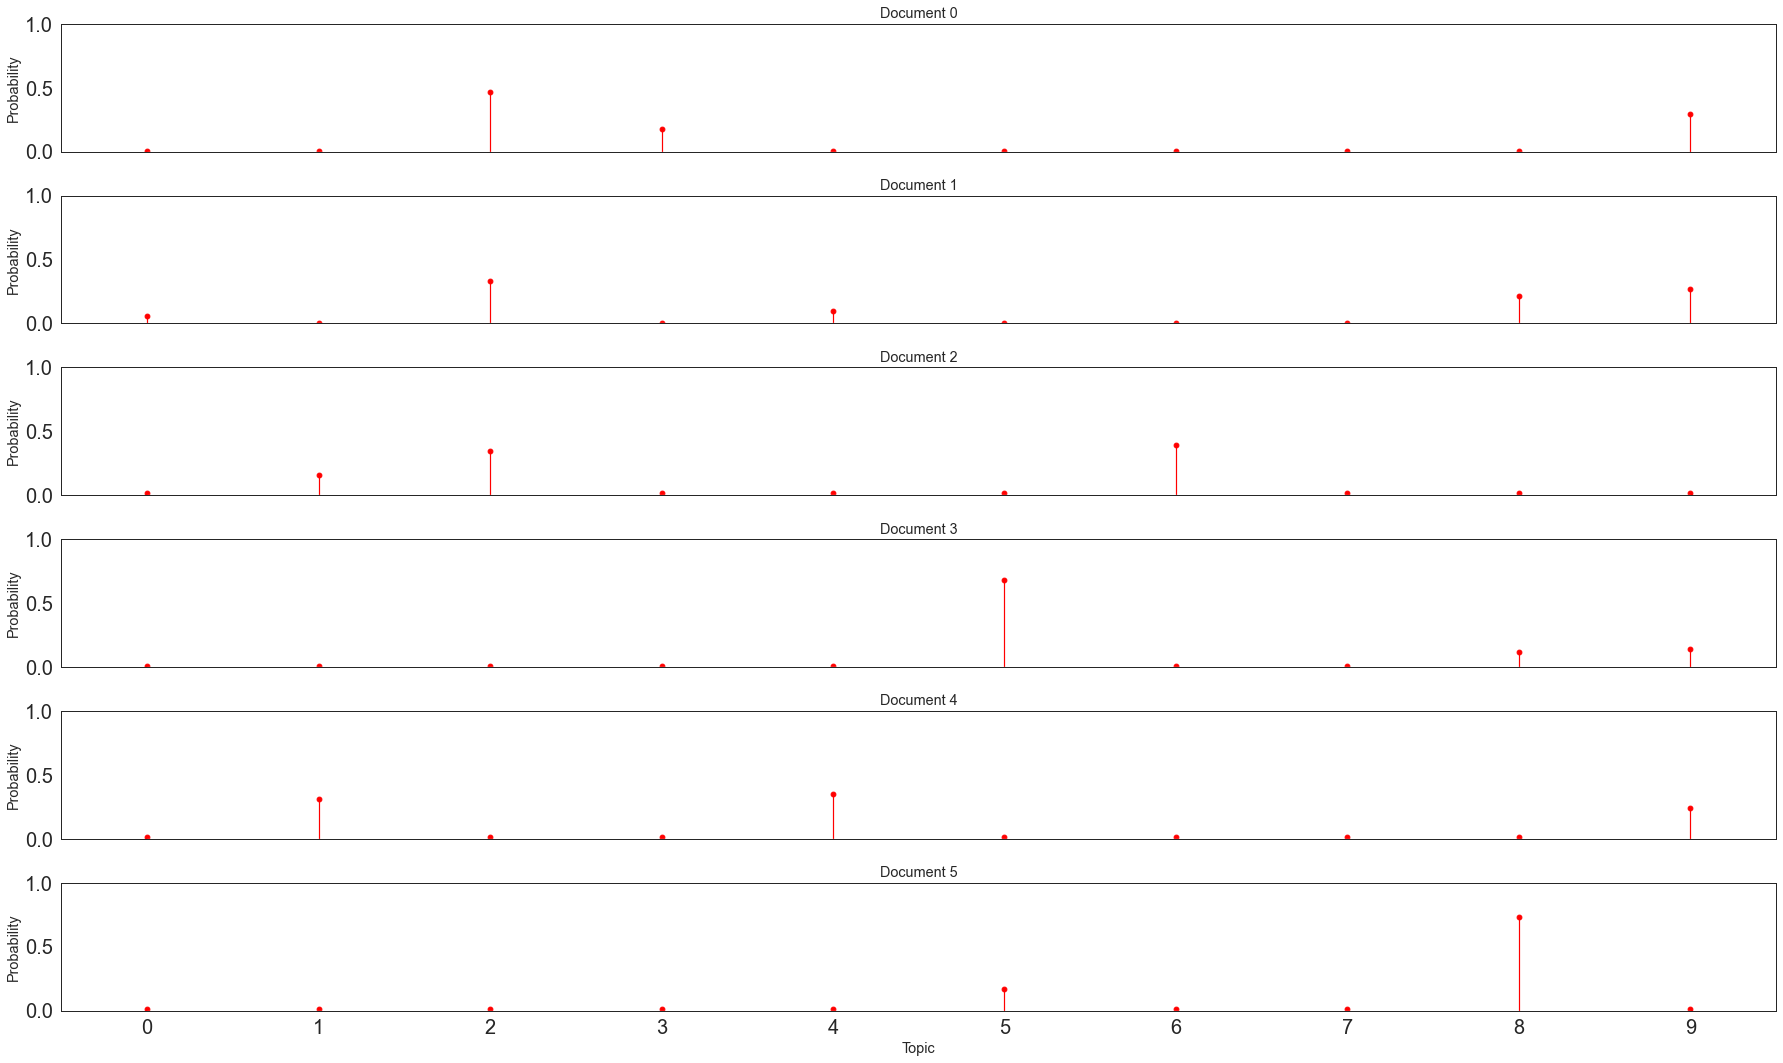

In [28]:
#doc_topic = model.doc_topic_
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

f, ax= plt.subplots(6, 1, figsize=(25, 15), sharex=True)
for i, k in enumerate(range(6)):
    ax[i].stem(doc_topic[k,:], linefmt='r-', markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-0.5, 9.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Probability")
    ax[i].set_title("Document {}".format(k))
    ax[i].set_xticks(list(range(10)) )
    
ax[5].set_xlabel("Topic")

plt.tight_layout()
plt.show()

In [46]:
# split the new DataFrame into training and testing sets
# Gives us 75 train : 25 test split
X_train, X_test, y_train, y_test = train_test_split(g7tweetsall['translated_tweet'], g7tweetsall['Dominant_Topic'], random_state=1, train_size=0.75)

In [47]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english', max_features=12000)
train_dtm = vect.fit_transform(X_train)
print( train_dtm.shape)
print( 'Features: ', train_dtm.shape[1])
test_dtm = vect.transform(X_test)
model = LogisticRegression()
model.fit(train_dtm, y_train)
y_pred_class = model.predict(test_dtm)
print( 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

(7438, 11624)
Features:  11624
Accuracy:  0.7483870967741936


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [45]:
# Need to load JS vis in the notebook
shap.initjs()

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


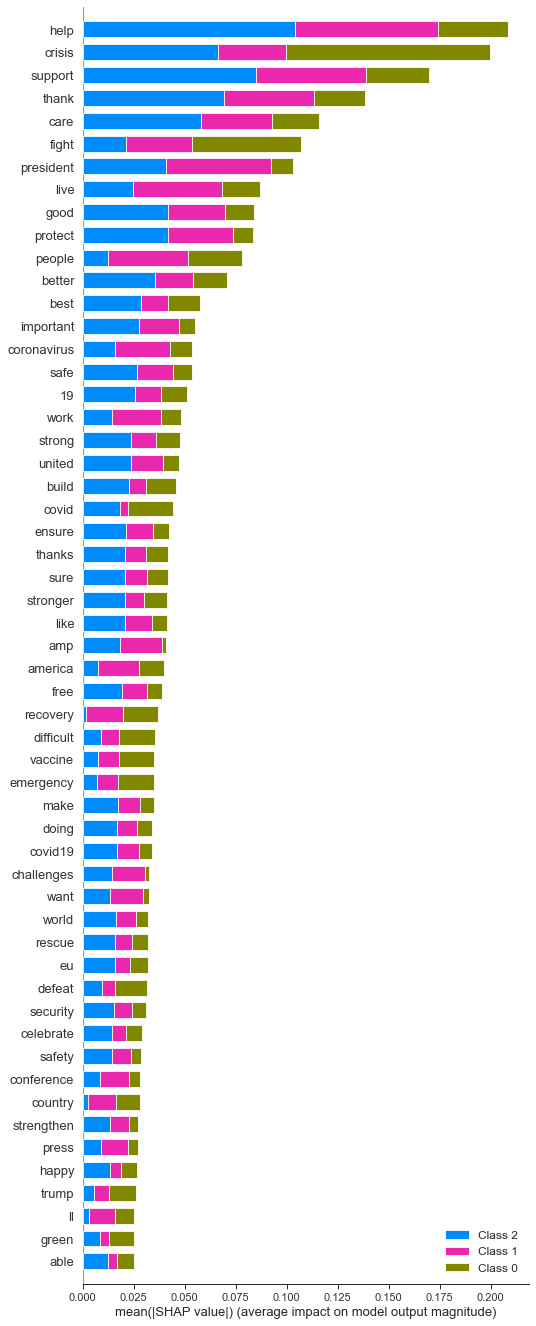

In [290]:
explainer = shap.LinearExplainer(model, train_dtm, feature_perturbation="interventional", feature_names=vect.get_feature_names())
shap_values = explainer.shap_values(train_dtm)
shap.summary_plot(shap_values, max_display=55, feature_names=vect.get_feature_names())

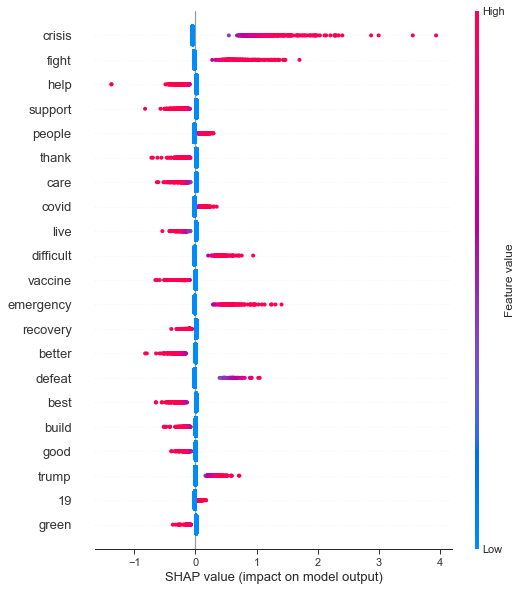

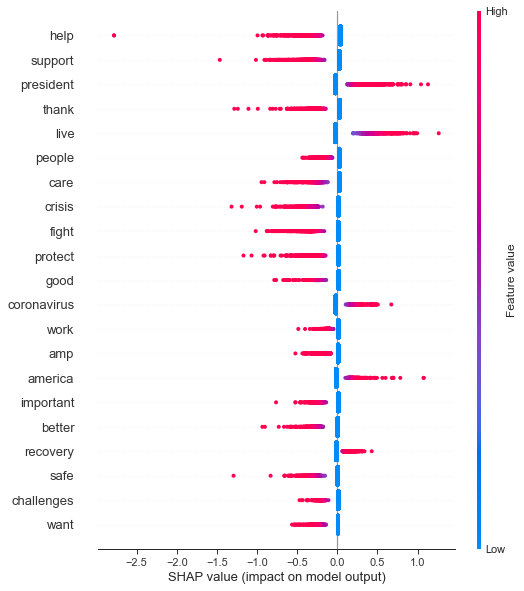

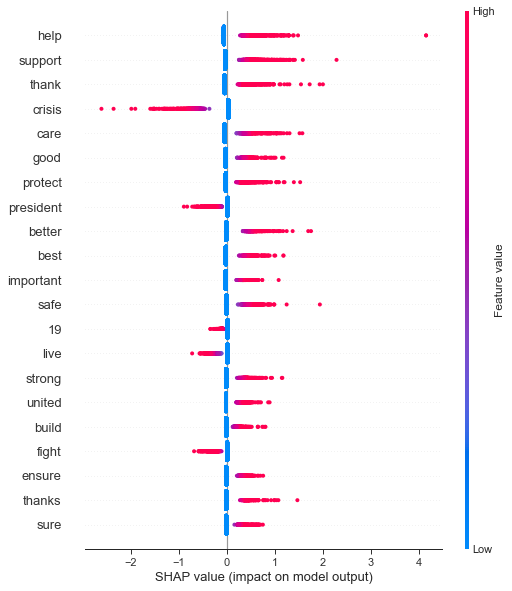

IndexError: list index out of range

In [297]:
for i in range(6):
    shap.summary_plot(shap_values[i], train_dtm.toarray(), max_display=21, feature_names=vect.get_feature_names())

In [269]:
shap.dependence_plot('president', shap_values[1], test_dtm)

ValueError: Could not find feature named: president

In [216]:
shap.plots.text(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'output_names'

In [142]:
explainer = shap.Explainer(pred)

AttributeError: 'str' object has no attribute 'shape'

In [185]:
vect.vocabulary_


{'homophobia': 5206,
 'transphobia': 10634,
 'biphobia': 1523,
 'place': 7872,
 'country': 2684,
 'true': 10705,
 'today': 10498,
 'idahotb': 5336,
 'day': 2909,
 'make': 6525,
 'sure': 10142,
 'live': 6369,
 'freely': 4538,
 'openly': 7436,
 'regardless': 8672,
 'love': 6444,
 'identify': 5342,
 'american': 884,
 'jobs': 5897,
 'plan': 7882,
 'modernize': 6913,
 '20': 87,
 '000': 1,
 'miles': 6811,
 'highways': 5148,
 'roads': 9057,
 'repair': 8801,
 '10': 9,
 'bridges': 1657,
 'need': 7148,
 'upgrade': 10947,
 'build': 1721,
 'new': 7195,
 'rail': 8451,
 'corridors': 2648,
 'transit': 10619,
 'lines': 6339,
 'reduce': 8632,
 'bottlenecks': 1608,
 'ports': 7993,
 'airports': 792,
 'tackle': 10221,
 'climate': 2194,
 'crisis': 2768,
 'credit': 2753,
 'program': 8223,
 'sectors': 9336,
 'pcstt': 7726,
 'touched': 10544,
 'aims': 782,
 'support': 10128,
 'hardest': 5000,
 'hit': 5164,
 'companies': 2338,
 'spoke': 9814,
 'australian': 1205,
 'pm': 7927,
 'number': 7315,
 'vital': 11155,


In [31]:
import torch

In [40]:
>>> # Initializing a BERT bert-base-uncased style configuration
>>> configuration = BertConfig()

>>> # Initializing a model from the bert-base-uncased style configuration
>>> model = BertModel(configuration)

>>> # Accessing the model configuration
>>> configuration = model.config

In [51]:
shap_values = explainer.shap_values(test_dtm.iloc[test_dtm.rand.index])

AttributeError: iloc not found

In [46]:
# we can sort the bar chart in decending order
shap.plots.bar(shap_values, order=shap.Explanation.argsort)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

In [36]:
shap_values = explainer(g7tweetsall['translated_tweet'])

AttributeError: 'str' object has no attribute 'shape'

In [27]:
tags_split = [tags.split(',') for tags in g7tweetsall['Topic'].values]
tag_encoder = MultiLabelBinarizer()
tags_encoded = tag_encoder.fit_transform(tags_split)
num_tags = len(tags_encoded[0])
train_size = int(len(g7tweetsall) * .8)

y_train = tags_encoded[: train_size]
y_test = tags_encoded[train_size:]

class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix
     
VOCAB_SIZE = 5000
train_post = g7tweetsall['translated_tweet'].values[: train_size]
test_post = g7tweetsall['translated_tweet'].values[train_size: ]
processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(train_post)
X_train = processor.transform_text(train_post)
X_test = processor.transform_text(test_post)

NameError: name 'text' is not defined

In [12]:
data = pd.DataFrame({'text':g7tweetsall['translated_tweet'],'topic':g7tweetsall['Topic']})

In [13]:
tokenizer = TfidfVectorizer(stop_words='english')
model = LogisticRegression()

In [16]:

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [38]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
#dtm = vect.fit_transform(yelp.text)
#features = vect.get_feature_names()


train_dtm = vect.fit_transform(X_train)
print( train_dtm.shape)
print( 'Features: ', train_dtm.shape[1])
test_dtm = vect.transform(X_test)
nb = LogisticRegression()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print( 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class)) 

NameError: name 'X_train' is not defined

In [97]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
# change this to read in your data
finder = BigramCollocationFinder.from_words(allWords)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print("Bigram analysis")
print(finder.nbest(bigram_measures.pmi, 10) )

Bigram analysis
[('σ', 'τ'), ('υ', 'χ'), ('𝐂', '𝐨'), ('𝗔', '𝗥'), ('𝗛', '𝗔'), ('𝗥', '𝗘'), ('𝗦', '𝗛'), ('\U000e006c', '\U000e0073'), ('\U000e0077', '\U000e006c'), ('τ', 'ώ')]


In [ ]:


#tokenized_article = [word for word in tokenized_article if word not in stopwords]
bigram_measures = nltk.collocations.BigramAssocMeasures()


# change this to read in your data
finder = BigramCollocationFinder.from_words(tokenized_article)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print("Bigram analysis")
print(finder.nbest(bigram_measures.pmi, 10) )

# change this to read in your data
finder = nltk.collocations.TrigramCollocationFinder.from_words(tokenized_article)

# only trigrams that appear 2+ times
finder.apply_freq_filter(2) 

trigram_measures = nltk.collocations.TrigramAssocMeasures()

print("Trigram analysis")
print(finder.nbest(trigram_measures.pmi, 15) )

SyntaxError: invalid syntax (<ipython-input-137-12b308a13956>, line 1)

In [ ]:
g7tweetsall.pivot_table(values='polarity', 
                index=['analysis'], aggfunc='count', margins=True)

In [50]:
g7tweetsall=g7tweetsall2

In [86]:
joebidentweets = g7tweetsall[g7tweetsall['leader']=="Joe Biden"]
borisjohnsontweets = g7tweetsall[g7tweetsall['leader']=="Boris Johnson"]
charlesmicheltweets = g7tweetsall[g7tweetsall['leader']=="Charles Michel"]
emmanuelmacrontweets = g7tweetsall[g7tweetsall['leader']=="Emmanuel Macron"]
italianprescounciltweets = g7tweetsall[g7tweetsall['leader']=="Italian Presidency Council"]
justintrudeautweets = g7tweetsall[g7tweetsall['leader']=="Justin Trudeau"]
ursulatweets = g7tweetsall[g7tweetsall['leader']=="Ursula von der Leyen"]
sugatweets = g7tweetsall[g7tweetsall['leader']=="Yoshihide Suga"]


topic1 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 1"]
topic2 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 2"]
topic3 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 3"]
topic4 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 4"]
topic5 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 5"]
topic6 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 6"]
topic7 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 7"]
topic8 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 8"]
topic9 = g7tweetsall[g7tweetsall['Dominant_Topic']=="Topic 9"]

In [84]:
anova(joebidentweets.polarity,
borisjohnsontweets.polarity,
charlesmicheltweets.polarity,
emmanuelmacrontweets.polarity,
italianprescounciltweets.polarity,
justintrudeautweets.polarity,
ursulatweets.polarity,
sugatweets.polarity)

ANOVA results: 

F-statistic = 74.2395  P-Value = 3.00096e-105
Decision: Reject null hypothesis


In [87]:
anova(joebidentweets.subjectivity,
borisjohnsontweets.subjectivity,
charlesmicheltweets.subjectivity,
emmanuelmacrontweets.subjectivity,
italianprescounciltweets.subjectivity,
justintrudeautweets.subjectivity,
ursulatweets.subjectivity,
sugatweets.subjectivity)

ANOVA results: 

F-statistic = 47.0216  P-Value = 4.76342e-66
Decision: Reject null hypothesis


In [90]:
anova(topic1.polarity,topic2.polarity,topic3.polarity,topic4.polarity,topic5.polarity,topic6.polarity,topic7.polarity,topic8.polarity)

ANOVA results: 

F-statistic = 50.5155  P-Value = 4.35922e-71
Decision: Reject null hypothesis


Text(0.5, 1.0, 'University Performance Based on Average Monthly Salary and Employment Rate\n')

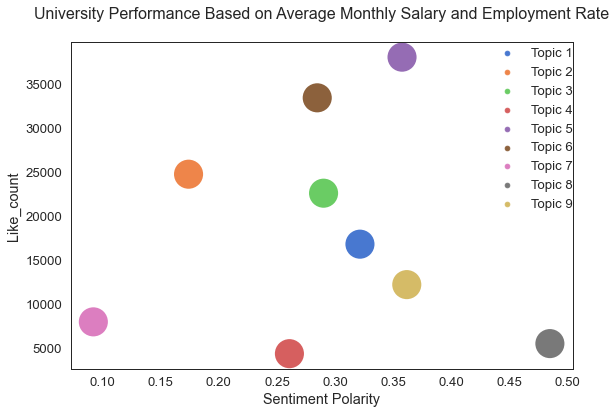

In [103]:
#aggregating data for plot

rankvizdf = g7tweetsall.pivot_table(values=['polarity','like_count'], index='Dominant_Topic',aggfunc='mean')
rankvizdf.reset_index(inplace=True)

#plotting into bubble plot (3 variables)

plt.figure(figsize=(9,6))
sns.scatterplot(x="polarity", y="like_count",
                hue="Dominant_Topic",s=1000,palette="muted",
                data=rankvizdf)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Like_count")
plt.title("University Performance Based on Average Monthly Salary and Employment Rate\n", fontsize=16)

In [113]:
topictrends = pd.read_csv('../datasets/topictrends.csv', index_col="Month")
topictrends

Topic 1_Vaccination  Topic 2_Situation Monitoring & Progress  \
Month                                                                    
Apr 2020             0.285500                                 0.346556   
May 2020             0.294667                                 0.535167   
Jun 2020             0.301833                                 0.103000   
Jul 2020             0.197778                                 0.291571   
Aug 2020             0.488000                                 0.047875   
Sep 2020             0.342800                                 0.453000   
Oct 2020             0.291182                                 0.368500   
Nov 2020             0.093600                                -0.150200   
Dec 2020             0.743250                                 0.859000   
Jan 2021             0.495750                                -0.124333   
Feb 2021             0.767167                                 0.045538   
Mar 2021             0.349429                                 0.139154   
Apr 2021             0.192100                                 0.104586   
May 2021             0.151364                                 0.280474   
Jun 2021             0.251154                                 0.162529   
Jul 2021             0.313133                                 0.226250   

          Topic 3_Negotiations  Topic 4_Pandemic Recovery  \
Month                                                       
Apr 2020              0.134716                   0.328250   
May 2020              0.104572                   0.113700   
Jun 2020              0.207710                   0.017263   
Jul 2020              0.163104                   0.183143   
Aug 2020              0.244834                   0.277813   
Sep 2020              0.188723                   0.411762   
Oct 2020              0.238099                   0.267875   
Nov 2020              0.240764                   0.276615   
Dec 2020              0.354331                   0.327333   
Jan 2021              0.332655                   0.172056   
Feb 2021              0.302928                   0.232056   
Mar 2021              0.346661                   0.334714   
Apr 2021              0.449017                   0.210517   
May 2021              0.338444                   0.451150   
Jun 2021              0.385038                   0.261409   
Jul 2021              0.321423                   0.252526   

          Topic 5_Rebuilding Future  Topic 6_Community Coordination  \
Month                                                                 
Apr 2020                   0.338667                        0.206362   
May 2020                   0.418333                        0.112297   
Jun 2020                   0.402875                        0.148398   
Jul 2020                   0.398750                        0.308752   
Aug 2020                   0.628625                        0.189103   
Sep 2020                   0.336143                        0.183417   
Oct 2020                   0.226357                        0.270667   
Nov 2020                   0.381583                        0.211915   
Dec 2020                   0.419750                        0.320971   
Jan 2021                   0.411556                        0.276509   
Feb 2021                   0.304923                        0.305766   
Mar 2021                   0.426263                        0.437052   
Apr 2021                   0.269667                        0.404450   
May 2021                   0.423462                        0.338776   
Jun 2021                   0.280294                        0.376374   
Jul 2021                   0.603200                        0.312669   

          Topic 7_Crisis Support and Subsidies  Topic 8_Diplomacy  \
Month                                                               
Apr 2020                             -0.130875           0.308682   
May 2020                             -0.084000           0.347394   
Jun 2020               

Text(0.5, 0.98, 'Sentiment Polarity Trend of LDA Topics\n\n')

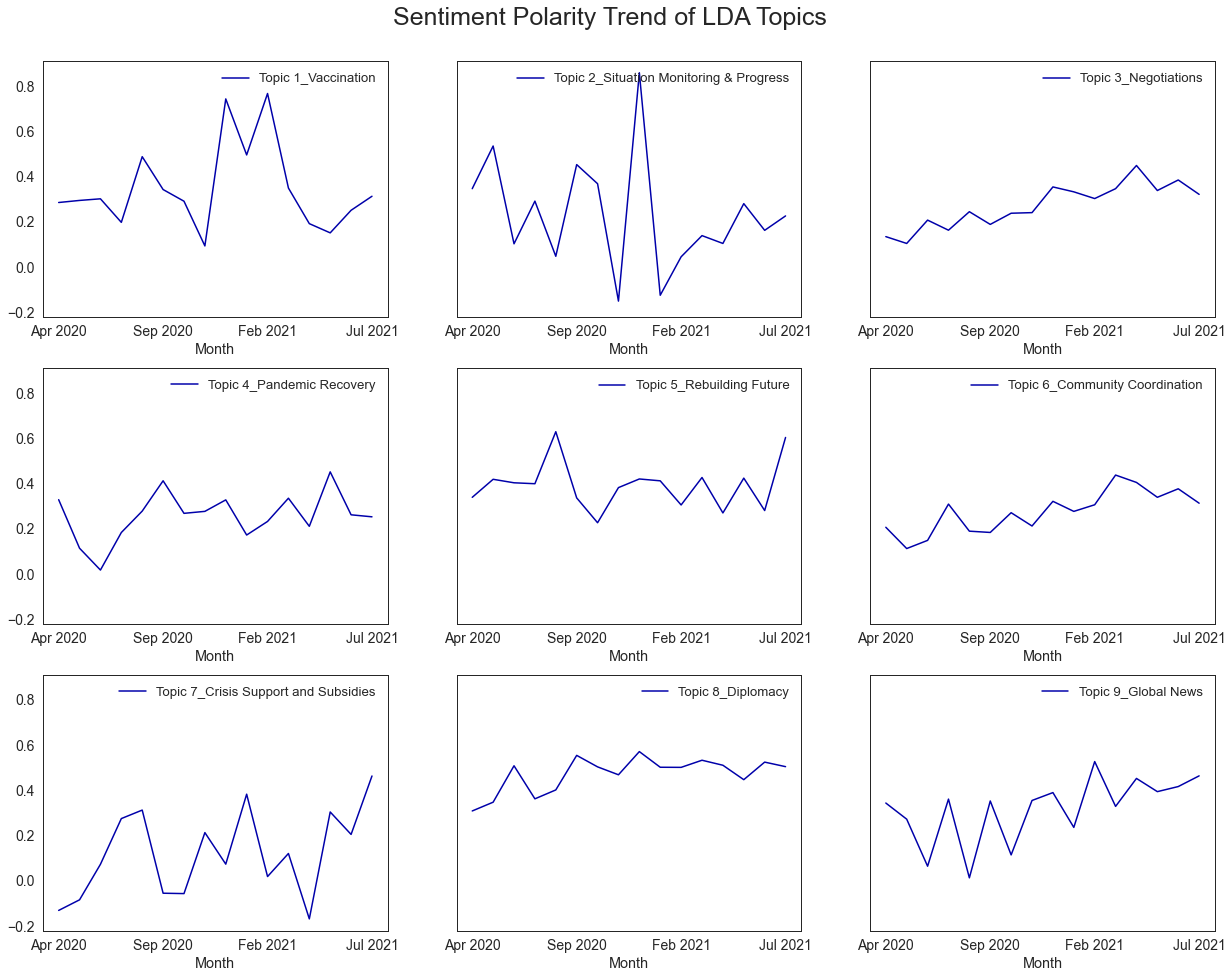

In [157]:
topictrends.plot(
    subplots=True, sharey=True, sharex=False, layout=(3,3), figsize=(21,15),linewidth=1.5, color="#0000aa", fontsize=14)  
plt.subplots_adjust(top=0.93)
plt.suptitle('Sentiment Polarity Trend of LDA Topics\n\n', fontsize = 25)

In [159]:
topictrendsfreq = pd.read_csv('../datasets/topictrendsfreq.csv', index_col="Month")
topictrendsfreq

Topic 1_Vaccination  Topic 2_Situation Monitoring & Progress  \
Month                                                                  
Apr-20             0.038434                                 0.040065   
May-20             0.037940                                 0.034887   
Jun-20             0.050369                                 0.033632   
Jul-20             0.042316                                 0.032942   
Aug-20             0.042492                                 0.036584   
Sep-20             0.051811                                 0.028851   
Oct-20             0.043146                                 0.029651   
Nov-20             0.041781                                 0.033362   
Dec-20             0.038257                                 0.025898   
Jan-21             0.037469                                 0.039007   
Feb-21             0.042855                                 0.033582   
Mar-21             0.039090                                 0.034072   
Apr-21             0.036495                                 0.041936   
May-21             0.036449                                 0.038037   
Jun-21             0.039685                                 0.037045   
Jul-21             0.047201                                 0.036937   

        Topic 3_Negotiations  Topic 4_Pandemic Recovery  \
Month                                                     
Apr-20              0.304262                   0.040604   
May-20              0.308591                   0.050545   
Jun-20              0.318637                   0.062596   
Jul-20              0.320649                   0.050948   
Aug-20              0.291711                   0.069648   
Sep-20              0.289796                   0.070226   
Oct-20              0.292297                   0.069183   
Nov-20              0.271527                   0.060248   
Dec-20              0.292257                   0.061683   
Jan-21              0.270702                   0.066998   
Feb-21              0.273671                   0.056681   
Mar-21              0.279165                   0.063708   
Apr-21              0.275783                   0.059426   
May-21              0.274299                   0.056980   
Jun-21              0.268613                   0.059887   
Jul-21              0.279911                   0.056672   

        Topic 5_Rebuilding Future  Topic 6_Community Coordination  \
Month                                                               
Apr-20                   0.067753                        0.224800   
May-20                   0.055293                        0.238197   
Jun-20                   0.050029                        0.217097   
Jul-20                   0.066459                        0.217727   
Aug-20                   0.046355                        0.257971   
Sep-20                   0.048366                        0.235378   
Oct-20                   0.071621                        0.234329   
Nov-20                   0.063839                        0.217170   
Dec-20                   0.063493                        0.187785   
Jan-21                   0.057156                        0.208021   
Feb-21                   0.059825                        0.206198   
Mar-21                   0.062223                        0.211325   
Apr-21                   0.061410                        0.205100   
May-21                   0.060105                        0.193700   
Jun-21                   0.055962                        0.178409   
Jul-21                   0.053873                        0.198647   

        Topic 7_Crisis Support and Subsidies  Topic 8_Diplomacy  \
Month                                                             
Apr-20                              0.042194           0.182923   
May-20                              0.029600           0.180312   
Jun-20                              0.031217           0.184004   
Jul-20                              0.030047           0.189805   
Aug

Text(0.5, 0.98, 'Sentiment Polarity Trend of LDA Topics\n\n')

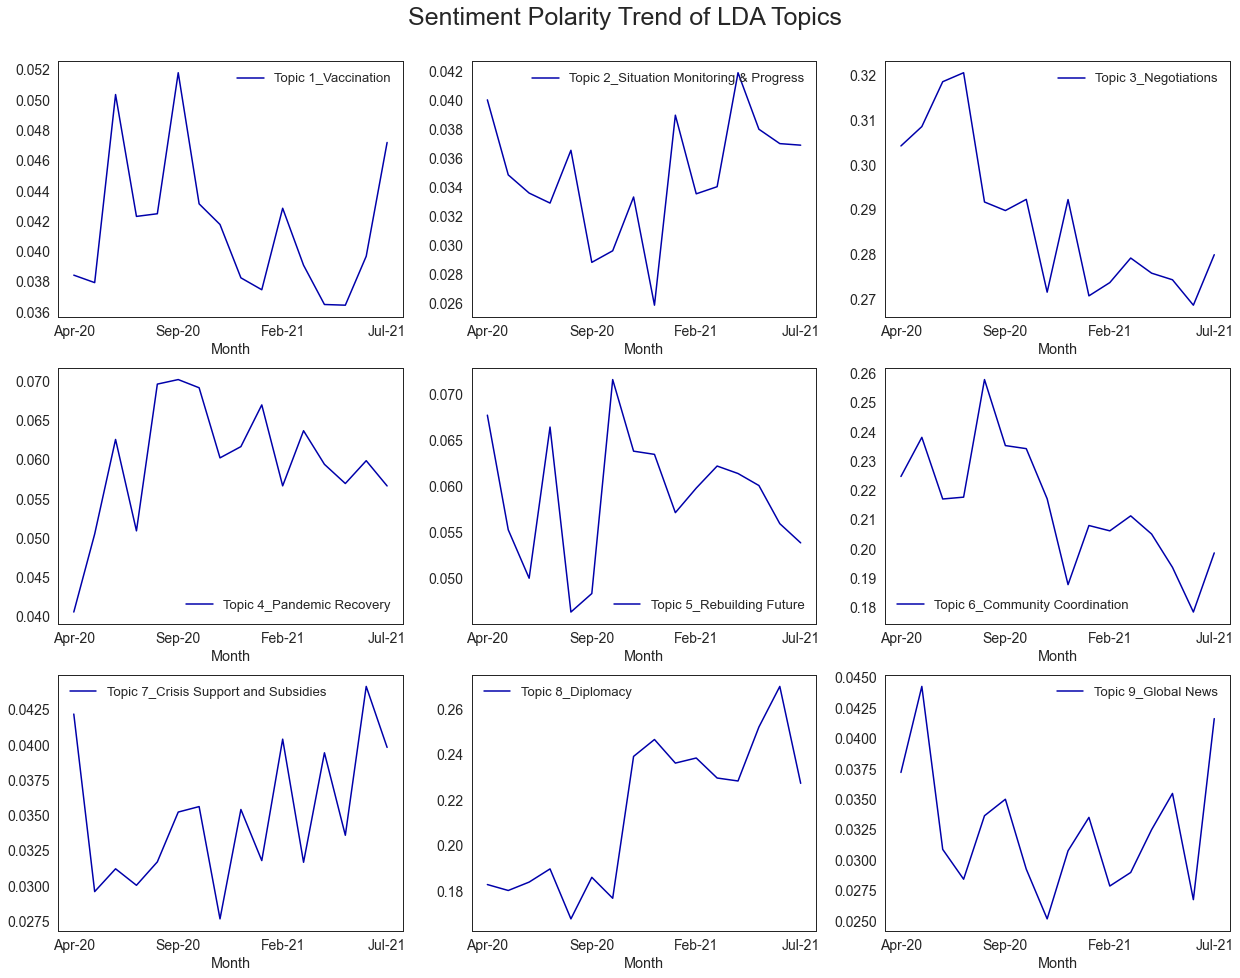

In [163]:
topictrendsfreq.plot(
    subplots=True, sharey=False, sharex=False, layout=(3,3), figsize=(21,15),linewidth=1.5, color="#0000aa", fontsize=14)  
plt.subplots_adjust(top=0.93)
plt.suptitle('Sentiment Polarity Trend of LDA Topics\n\n', fontsize = 25)

In [48]:
leadertopic = pd.read_csv('../datasets/leader_topic_loadings.csv', index_col="Leader")
leadertopic1 = pd.read_csv('../datasets/leader_topic_loadings_apr20_jul20.csv', index_col="Leader")
leadertopic2 = pd.read_csv('../datasets/leader_topic_loadings_aug20_nov20.csv', index_col="Leader")
leadertopic3 = pd.read_csv('../datasets/leader_topic_loadings_dec20_mar21.csv', index_col="Leader")
leadertopic4 = pd.read_csv('../datasets/leader_topic_loadings_apr21_jul21.csv', index_col="Leader")
leadertopicall = pd.read_csv('../datasets/leader_topic_loadings_combined.csv', index_col="Leader")
leadertopicdetail = pd.read_csv('../datasets/leader_topic_loadings_detail.csv', index_col="leader")
leadertopic = pd.read_csv('../datasets/leader_topic_loadings.csv', index_col="Leader")

In [47]:
leadertopic

Topic 1_Vaccination  \
Leader                                            
Boris Johnson                          0.049504   
Charles Michel                         0.037659   
Emmanuel Macron                        0.057985   
Italian Presidency Council             0.042457   
Joe Biden                              0.036323   
Justin Trudeau                         0.044150   
Ursula von der Leyen                   0.031436   
Yoshihide Suga                         0.035565   

                            Topic 2_Situation Monitoring & Progress  \
Leader                                                                
Boris Johnson                                              0.044681   
Charles Michel                                             0.023530   
Emmanuel Macron                                            0.042210   
Italian Presidency Council                                 0.030245   
Joe Biden                                                  0.040996   
Justin Trudeau                                             0.041633   
Ursula von der Leyen                                       0.016938   
Yoshihide Suga                                             0.021586   

                            Topic 3_Negotiations  Topic 4_Pandemic Recovery  \
Leader                                                                        
Boris Johnson                           0.313678                   0.046895   
Charles Michel                          0.211202                   0.071680   
Emmanuel Macron                         0.257048                   0.070153   
Italian Presidency Council              0.319173                   0.118422   
Joe Biden                               0.322981                   0.033484   
Justin Trudeau                          0.287432                   0.050089   
Ursula von der Leyen                    0.205958                   0.056134   
Yoshihide Suga                          0.325191                   0.155536   

                            Topic 5_Rebuilding Future  \
Leader                                                  
Boris Johnson                                0.047318   
Charles Michel                               0.057821   
Emmanuel Macron                              0.051916   
Italian Presidency Council                   0.070240   
Joe Biden                                    0.052662   
Justin Trudeau                               0.062881   
Ursula von der Leyen                         0.079745   
Yoshihide Suga                               0.040499   

                            Topic 6_Community Coordination  \
Leader                                                       
Boris Johnson                                     0.245595   
Charles Michel                                    0.122594   
Emmanuel Macron                                   0.195920   
Italian Presidency Council                        0.131369   
Joe Biden                                         0.300821   
Justin Trudeau                                    0.210926   
Ursula von der Leyen                              0.138490   
Yoshihide Suga                                    0.132906   

                            Topic 7_Crisis Support and Subsidies  \
Leader                                                             
Boris Johnson                                           0.026542   
Charles Michel                                          0.028579   
Emmanuel Macron                                         0.036417   
Italian Presidency Council                              0.046636   
Joe Biden                                               0.038379   
Justin Trudeau                                          0.038682   
Ursula von der Leyen                                    0.035028   
Yoshihide Suga                                          0.015329   

                            Topic 8_Diplomacy  Topic 9_Global News  
Leader                                                              
Bori

In [49]:
topicleader=leadertopic.transpose()
topicleader.index

Index(['Topic 1_Vaccination', 'Topic 2_Situation Monitoring & Progress',
       'Topic 3_Negotiations', 'Topic 4_Pandemic Recovery',
       'Topic 5_Rebuilding Future', 'Topic 6_Community Coordination',
       'Topic 7_Crisis Support and Subsidies', 'Topic 8_Diplomacy',
       'Topic 9_Global News'],
      dtype='object')

In [50]:
topicleaderdetail=leadertopicdetail.transpose()
topicleaderdetail

leader                                   Joe Biden  Joe Biden  \
Topic 1_Vaccination                       0.000000   0.000000   
Topic 2_Situation Monitoring & Progress   0.218243   0.000000   
Topic 3_Negotiations                      0.324816   0.230583   
Topic 4_Pandemic Recovery                 0.057905   0.000000   
Topic 5_Rebuilding Future                 0.059243   0.426574   
Topic 6_Community Coordination            0.263076   0.177968   
Topic 7_Crisis Support and Subsidies      0.060047   0.046236   
Topic 8_Diplomacy                         0.000000   0.100120   
Topic 9_Global News                       0.000000   0.000000   

leader                                   Emmanuel Macron  \
Topic 1_Vaccination                             0.011111   
Topic 2_Situation Monitoring & Progress         0.011111   
Topic 3_Negotiations                            0.011117   
Topic 4_Pandemic Recovery                       0.011111   
Topic 5_Rebuilding Future                       0.011112   
Topic 6_Community Coordination                  0.911104   
Topic 7_Crisis Support and Subsidies            0.011111   
Topic 8_Diplomacy                               0.011112   
Topic 9_Global News                             0.011111   

leader                                   Ursula von der Leyen  \
Topic 1_Vaccination                                  0.000000   
Topic 2_Situation Monitoring & Progress              0.000000   
Topic 3_Negotiations                                 0.096390   
Topic 4_Pandemic Recovery                            0.000000   
Topic 5_Rebuilding Future                            0.580960   
Topic 6_Community Coordination                       0.000000   
Topic 7_Crisis Support and Subsidies                 0.000000   
Topic 8_Diplomacy                                    0.278185   
Topic 9_Global News                                  0.000000   

leader                                   Italian Presidency Council  \
Topic 1_Vaccination                                        0.000000   
Topic 2_Situation Monitoring & Progress                    0.000000   
Topic 3_Negotiations                                       0.000000   
Topic 4_Pandemic Recovery                                  0.205798   
Topic 5_Rebuilding Future                                  0.000000   
Topic 6_Community Coordination                             0.342911   
Topic 7_Crisis Support and Subsidies                       0.000000   
Topic 8_Diplomacy                                          0.288533   
Topic 9_Global News                                        0.116447   

leader                                   Ursula von der Leyen  Boris Johnson  \
Topic 1_Vaccination                                  0.129333       0.015879   
Topic 2_Situation Monitoring & Progress              0.144422       0.015882   
Topic 3_Negotiations                                 0.336429       0.015876   
Topic 4_Pandemic Recovery                            0.000000       0.015877   
Topic 5_Rebuilding Future                            0.000000       0.015878   
Topic 6_Community Coordination                       0.261413       0.872976   
Topic 7_Crisis Support and Subsidies                 0.000000       0.015879   
Topic 8_Diplomacy                                    0.094205       0.015874   
Topic 9_Global News                                  0.000000       0.015880   

leader                                   Italian Presidency Council  \
Topic 1_Vaccination                                        0.027778   
Topic 2_Situation Monitoring & Progress                    0.027778   
Topic 3_Negotiations                                       0.777776   
Topic 4_Pandemic Recovery                                  0.027778   
Topic 5_Rebuilding Future                                  0.027778   
Topic 6_Community Coordination                             0.027779   
Topic 7_Crisis Support and Subsidies                       0.027778   
Topic 8_Diplomacy

<AxesSubplot:>

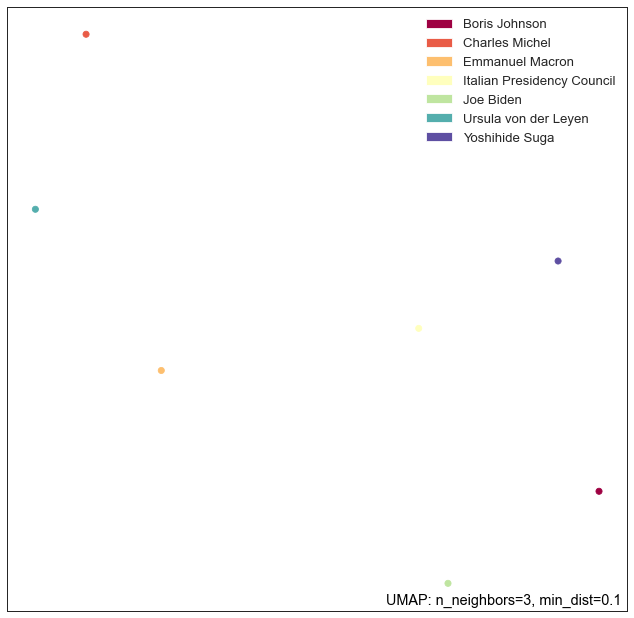

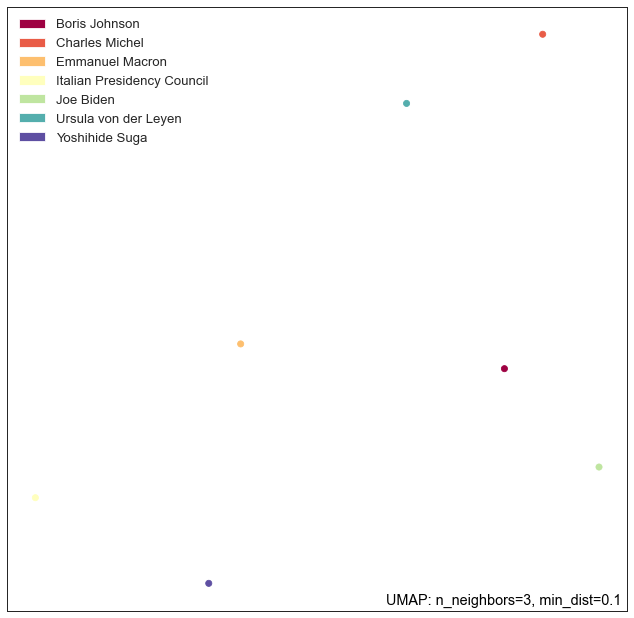

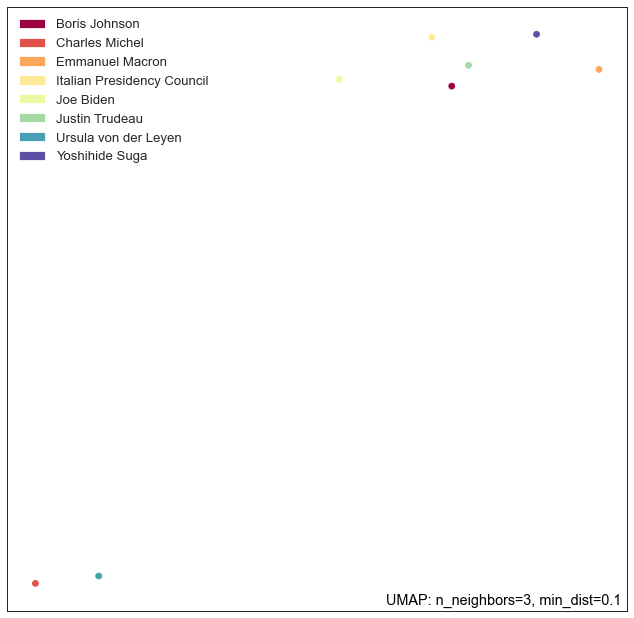

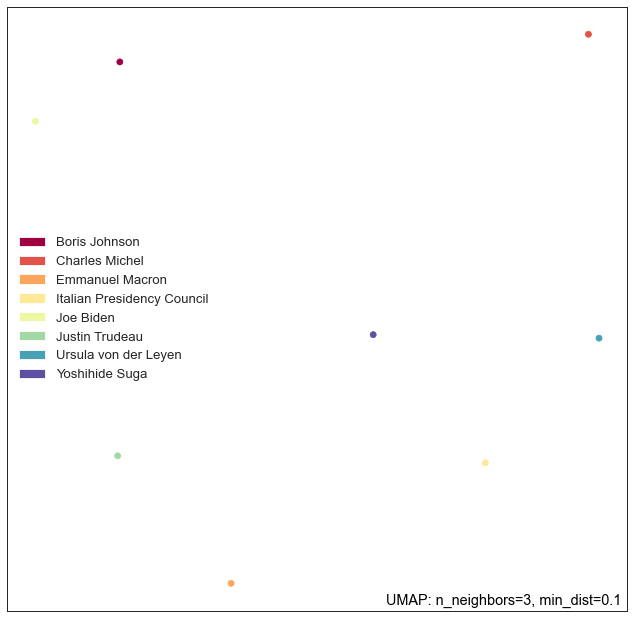

In [181]:
mapper1 = umap.UMAP(n_neighbors=3).fit(leadertopic1)
mapper2 = umap.UMAP(n_neighbors=3).fit(leadertopic2)
mapper3 = umap.UMAP(n_neighbors=3).fit(leadertopic3)
mapper4 = umap.UMAP(n_neighbors=3).fit(leadertopic4)
umap.plot.points(mapper1, labels=leadertopic1.index)
umap.plot.points(mapper2, labels=leadertopic2.index)
umap.plot.points(mapper3, labels=leadertopic3.index)
umap.plot.points(mapper4, labels=leadertopic4.index)

The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11103. The TBB threading layer is disabled.


<AxesSubplot:>

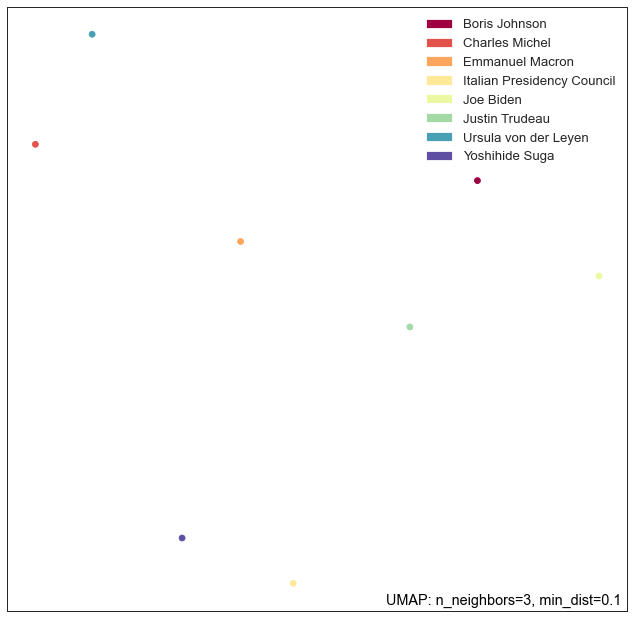

In [301]:
mapper = umap.UMAP(n_neighbors=3).fit(leadertopic)
umap.plot.points(mapper, labels=leadertopic.index)

invalid value encountered in true_divide


<AxesSubplot:>

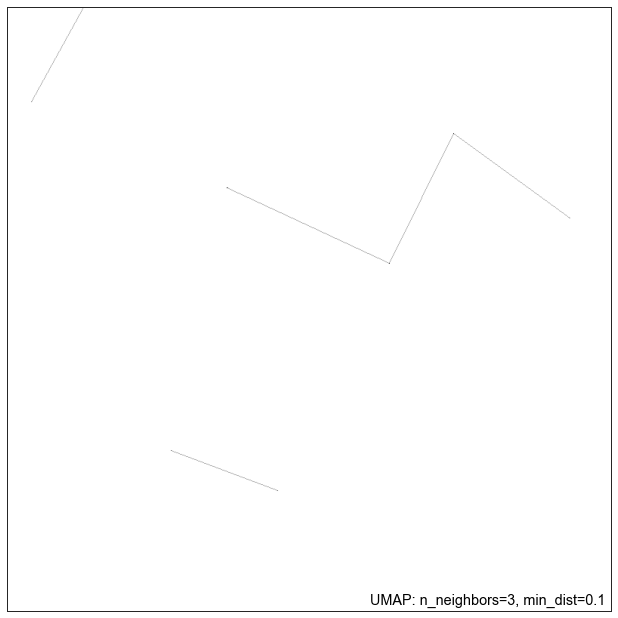

In [302]:
umap.plot.connectivity(mapper, show_points=True)

In [298]:
mapper = umap.UMAP(n_neighbors=2).fit(topicleaderdetail)
umap.plot.points(mapper, labels=topicleaderdetail.index)

NameError: name 'topicleaderdetail' is not defined

In [35]:
mapper = umap.UMAP(n_neighbors=30000).fit(leadertopicall)
umap.plot.points(mapper, labels=leadertopicall.index)

NameError: name 'leadertopicall' is not defined

The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11103. The TBB threading layer is disabled.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

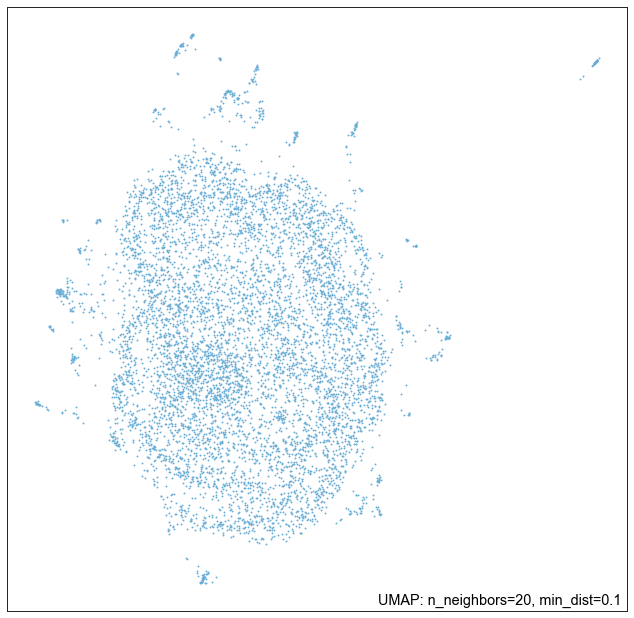

In [51]:
mapper = umap.UMAP(n_neighbors=20).fit(train_dtm)
umap.plot.points(mapper)

In [168]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [172]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(tf)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral');

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11103. The TBB threading layer is disabled.
  warnings.warn(problem)


NameError: name 'mnist' is not defined

In [187]:
kmeans_labels = cluster.KMeans(n_clusters=9).fit_predict(tf)

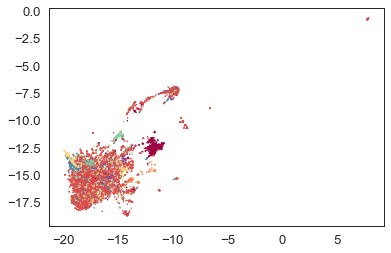

In [189]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.5, cmap='Spectral');

In [70]:
tfidf_embedding = umap.UMAP(metric='hellinger').fit(train_dtm)


A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 201 edges.
It has only fully disconnected 10 vertices.
Use umap.utils.disconnected_vertices() to identify them.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


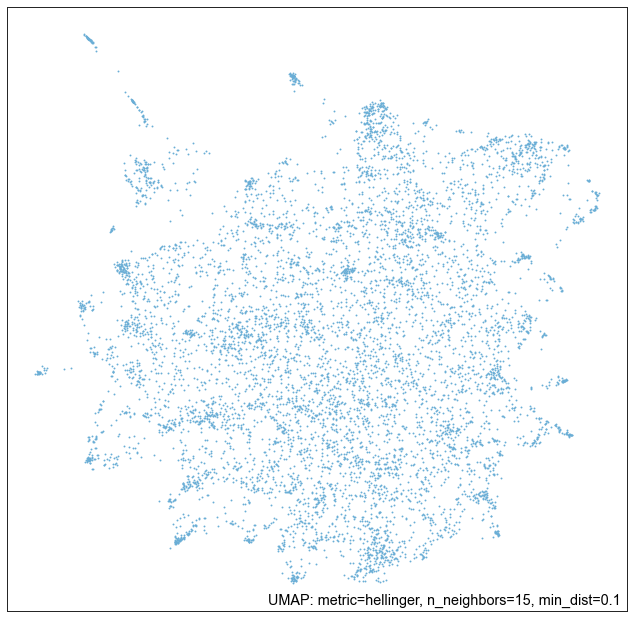

In [82]:
fig = umap.plot.points(tfidf_embedding)

In [78]:
train_dtm

<7438x11624 sparse matrix of type '<class 'numpy.float64'>'
	with 118732 stored elements in Compressed Sparse Row format>

In [33]:
trumpdata = pd.read_csv('../datasets/g7tweetsdatawithsentiment2.csv')
trumpdata = trumpdata[trumpdata['leader']=="Joe Biden"]
trumpyes = trumpdata[trumpdata['contains_trump']==1]
trumpno = trumpdata[trumpdata['contains_trump']==0]

<AxesSubplot:xlabel='contains_trump', ylabel='polarity'>

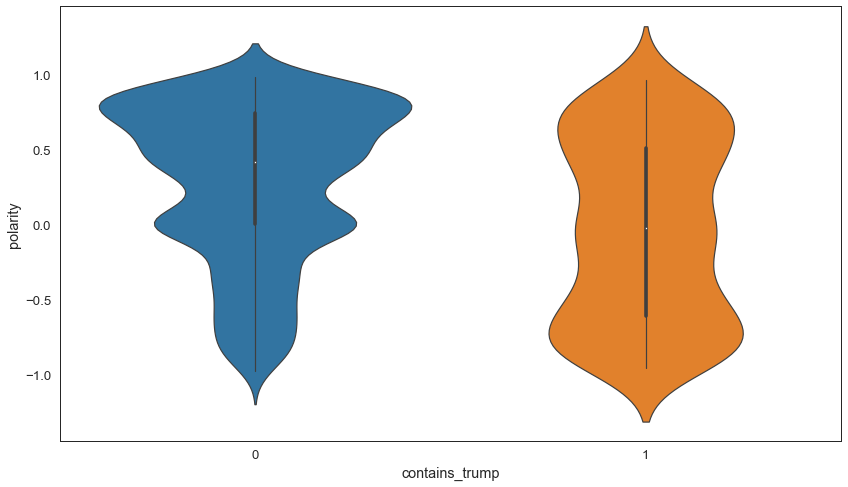

In [23]:
sns.violinplot(y="polarity", x="contains_trump", data=trumpdata, dodge=True)

In [34]:
uppertailtest(trumpyes.polarity, trumpno.polarity)

Upper-tailed Hypothesis Test Results: 

Statistic = -10.6196  P-Value = 1.56146e-24
Decision: Reject null hypothesis


In [83]:
g7tweetsall.to_csv('../datasets/g7tweetsdatawithsentiment.csv')